# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [471]:
# Import warnings
import warnings


In [472]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [473]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [474]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1          2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2          2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3          1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4          2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
..       ...                  ...                   ...              ...   
95         2  2023-01-01 00:20:38   2023-01-01 00:21:26              1.0   
96         2  2023-01-01 00:09:16   2023-01-01 00:30:17              1.0   
97         2  2023-01-01 00:46:56   2023-01-01 00:59:16              1.0   
98         2  2023-01-01 00:10:50   2023-01-01 00:20:19              1.0   
99         2  2023-01-01 00:27:35   2023-01-01 00:37:49              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.97         1.0                  N           161           141   
1            1.10         1.0                  N            43           237   
2            2.51         1.0                  N            48           238   
3            1.90         1.0                  N           138             7   
4            1.43         1.0                  N           107            79   
..            ...         ...                ...           ...           ...   
95           0.08         1.0                  N            75            75   
96           6.22         1.0                  N           138            95   
97           4.56         1.0                  N           132           218   
98           1.41         1.0                  N           264           186   
99           1.70         1.0                  N           264           114   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              2          9.3   1.00      0.5        0.00           0.0   
1              1          7.9   1.00      0.5        4.00           0.0   
2              1         14.9   1.00      0.5       15.00           0.0   
3              1         12.1   7.25      0.5        0.00           0.0   
4              1         11.4   1.00      0.5        3.28           0.0   
..           ...          ...    ...      ...         ...           ...   
95             2          3.0   1.00      0.5        0.00           0.0   
96             2         31.0   6.00      0.5        0.00           0.0   
97             1         20.5   1.00      0.5        5.75           0.0   
98             1         10.7   1.00      0.5        3.92           0.0   
99             1         11.4   1.00      0.5        2.00           0.0   

    improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                     1.0         14.30                   2.5         0.00  
1                     1.0         16.90                   2.5         0.00  
2                     1.0         34.90                   2.5         0.00  
3                     1.0         20.85                   0.0         1.25  
4                     1.0         19.68                   2.5         0.00  
..                    ...           ...                   ...          ...  
95                    1.0          5.50                   0.0         0.00  
96                    1.0         39.75                   0.0         1.25  
97                    1.0         30.00                   0.0         1.25  
98                    1.0         19.62                   2.5         0.00  
99                    1.0         18.40                   2.5         0.00  

[100 rows x 19 columns]

In [475]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [476]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df= pd.DataFrame()

In [477]:
# from google.colab import drive
# drive.mount('/content/drive')

In [478]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:/Sowmya-Upgrad/Assignment-EDA/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        dfFile = pd.read_parquet(file_path)

        
        dfFile['tpep_pickup_date'] = dfFile['tpep_pickup_datetime'].dt.date
        dfFile['tpep_pickup_hour'] = dfFile['tpep_pickup_datetime'].dt.hour
  
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for dateFromFile in dfFile['tpep_pickup_date'].unique():

            # Iterate through each hour of the selected date
            date_df = dfFile[dfFile['tpep_pickup_date'] == dateFromFile]
            for hourFromFile in range(24):
                hourly_df = date_df[date_df['tpep_pickup_hour'] == hourFromFile]

                # Sample 5% of the hourly data randomly
                if not hourly_df.empty:
                    sampled_hour = hourly_df.sample(frac=0.05, random_state = 42)
                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sampled_hour], ignore_index=True)
                    
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True) # we initialised this empty DF earlier
        print(f'Sampled Data for file at path {file_path}')
        
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Sampled Data for file at path C:\Sowmya-Upgrad\Assignment-EDA\trip_records\2023-1.parquet
Sampled Data for file at path C:\Sowmya-Upgrad\Assignment-EDA\trip_records\2023-10.parquet
Sampled Data for file at path C:\Sowmya-Upgrad\Assignment-EDA\trip_records\2023-11.parquet
Sampled Data for file at path C:\Sowmya-Upgrad\Assignment-EDA\trip_records\2023-12.parquet
Sampled Data for file at path C:\Sowmya-Upgrad\Assignment-EDA\trip_records\2023-2.parquet
Sampled Data for file at path C:\Sowmya-Upgrad\Assignment-EDA\trip_records\2023-3.parquet
Sampled Data for file at path C:\Sowmya-Upgrad\Assignment-EDA\trip_records\2023-4.parquet
Sampled Data for file at path C:\Sowmya-Upgrad\Assignment-EDA\trip_records\2023-5.parquet
Sampled Data for file at path C:\Sowmya-Upgrad\Assignment-EDA\trip_records\2023-6.parquet
Sampled Data for file at path C:\Sowmya-Upgrad\Assignment-EDA\trip_records\2023-7.parquet
Sampled Data for file at path C:\Sowmya-Upgrad\Assignment-EDA\trip_records\2023-8.parquet
Sampled

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [479]:
df.to_csv('C:/Sowmya-Upgrad/Assignment-EDA/Concatenated2023Data.csv', index=False)

In [480]:
df.shape

(1896400, 22)

In [481]:
grouped = df.groupby(['tpep_pickup_date', 'tpep_pickup_hour'])

samples = []

for name, group in grouped:
    # Sample 5% of each group
    n = max(1, int(len(group) * 0.05))  # ensure at least one row
    sample = group.sample(n=n, random_state=42)
    samples.append(sample)

smaller_sample = pd.concat(samples).reset_index(drop=True)

# Save to CSV
smaller_sample.to_csv('C:/Sowmya-Upgrad/Assignment-EDA/ConcatenatedSmaller2023Data.csv', index=False)


In [482]:
#df.to_csv('C:/Sowmya-Upgrad/Assignment-EDA/Concatenated2023Data.csv')

In [483]:
# Store the df in csv/parquet
#df.to_csv('C:/Sowmya-Upgrad/Assignment-EDA/Concatenated2023Data.csv')
# overwrite smaller sample to df, to avoid any memory issues.
smaller_sample.shape

df = smaller_sample.copy()
smaller_sample = pd.DataFrame()
df.shape

(91148, 22)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [484]:
# Load the new data file
df = pd.read_csv('C:/Sowmya-Upgrad/Assignment-EDA/ConcatenatedSmaller2023Data.csv')


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [485]:
# Fix the index and drop any columns that are not needed
# As tpep_pickup_datetime isused to identify and analyze non duplicate data, we can choose this as index.
# df.set_index('tpep_pickup_datetime', inplace=True)

# dropping of the date column are they are nolonger needed after the sampling
df.drop(columns=['tpep_pickup_date'], inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [486]:
# Combine the two airport fee columns
# There are two columns for Airport fee by some error, If One column has values other has nulls and vice-versa, so these can be merged into one column.
# So having the 'Airport_fee' column and removing other as this column has more non-null values

df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])

df.drop(columns=['airport_fee'], inplace=True)



In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91148 entries, 0 to 91147
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               91148 non-null  int64  
 1   tpep_pickup_datetime   91148 non-null  object 
 2   tpep_dropoff_datetime  91148 non-null  object 
 3   passenger_count        88021 non-null  float64
 4   trip_distance          91148 non-null  float64
 5   RatecodeID             88021 non-null  float64
 6   store_and_fwd_flag     88021 non-null  object 
 7   PULocationID           91148 non-null  int64  
 8   DOLocationID           91148 non-null  int64  
 9   payment_type           91148 non-null  int64  
 10  fare_amount            91148 non-null  float64
 11  extra                  91148 non-null  float64
 12  mta_tax                91148 non-null  float64
 13  tip_amount             91148 non-null  float64
 14  tolls_amount           91148 non-null  float64
 15  im

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [488]:
# check where values of fare amount are negative
# if there are negative fare amounts, we can set to 0
df['fare_amount'] = df['fare_amount'].apply(lambda x: max(x, 0))



Did you notice something different in the `RatecodeID` column for above records?

In [489]:
# Analyse RatecodeID for the negative fare amounts
# There are no negative fare amounts , so no analysis for RateCodeID of -FareAmounts


In [490]:
# Find which columns have negative values
# The below columns has negative values
# mta_tax , improvement_surcharge , total_amount , congestion_surcharge , Airport_fee



In [491]:
# fix these negative values

# As the negative values doesn't make sense in the tax and surcharge or amount columns, we can make 0 so it can not impact any aggregations.

df['mta_tax'] = df['mta_tax'].apply(lambda x: 0 if x < 0 else x)
df['improvement_surcharge'] = df['improvement_surcharge'].apply(lambda x: 0 if x < 0 else x)
df['total_amount'] = df['total_amount'].apply(lambda x: 0 if x < 0 else x)
df['congestion_surcharge'] = df['congestion_surcharge'].apply(lambda x: 0 if x < 0 else x)
df['Airport_fee'] = df['Airport_fee'].apply(lambda x: 0 if x < 0 else x)



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [492]:
# Find the proportion of missing values in each column

missingVal_proportion = df.isnull().mean()*100
missingVal_proportion

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.430684
trip_distance            0.000000
RatecodeID               3.430684
store_and_fwd_flag       3.430684
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.430684
tpep_pickup_hour         0.000000
Airport_fee              3.430684
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [493]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df[df['passenger_count'].isnull()]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
10            2  2023-01-01 00:16:00   2023-01-01 00:38:00              NaN   
31            2  2023-01-01 02:49:44   2023-01-01 03:15:46              NaN   
35            2  2023-01-01 02:44:41   2023-01-01 02:48:46              NaN   
50            2  2023-01-01 04:06:00   2023-01-01 04:16:00              NaN   
61            2  2023-01-01 08:22:57   2023-01-01 08:36:19              NaN   
...         ...                  ...                   ...              ...   
91111         2  2023-12-31 20:15:12   2023-12-31 20:18:23              NaN   
91121         2  2023-12-31 21:23:44   2023-12-31 21:46:55              NaN   
91125         2  2023-12-31 21:33:12   2023-12-31 21:44:45              NaN   
91131         2  2023-12-31 22:26:10   2023-12-31 22:44:59              NaN   
91133         1  2023-12-31 22:05:23   2023-12-31 22:20:02              NaN   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
10              4.77         NaN                NaN            90   
31              7.91         NaN                NaN            48   
35              0.80         NaN                NaN           141   
50              2.02         NaN                NaN            79   
61              4.65         NaN                NaN           237   
...              ...         ...                ...           ...   
91111           0.53         NaN                NaN           237   
91121           6.30         NaN                NaN           226   
91125           2.13         NaN                NaN           137   
91131           8.72         NaN                NaN           141   
91133           0.00         NaN                NaN           229   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
10              262             0        27.42    0.0      0.5        7.86   
31              265             0        46.24    0.0      0.5        1.00   
35              262             0        12.80    0.0      0.5        3.36   
50               87             0        14.56    0.0      0.5        0.00   
61              232             0        25.24    0.0      0.5        5.85   
...             ...           ...          ...    ...      ...         ...   
91111           237             0         8.08    0.0      0.5        0.00   
91121            79             0        23.69    0.0      0.5        0.00   
91125           141             0        12.06    0.0      0.5        0.00   
91131           125             0        29.66    0.0      0.5        0.00   
91133            79             0        16.50    0.0      0.5        0.00   

       tolls_amount  improvement_surcharge  total_amount  \
10             0.00                    1.0         39.28   
31            11.75                    1.0         62.99   
35             0.00                    1.0         20.16   
50             0.00                    1.0         18.56   
61             0.00                    1.0         35.09   
...             ...                    ...           ...   
91111          0.00                    1.0         12.08   
91121          0.00                    1.0         27.69   
91125          0.00                    1.0         16.06   
91131          0.00                    1.0         33.66   
91133          0.00                    1.0         20.50   

       congestion_surcharge  tpep_pickup_hour  Airport_fee  
10                      NaN                 0          NaN  
31                      NaN                 2          NaN  
35                      NaN                 2          NaN  
50                      NaN                 4          NaN  
61                      NaN                 8          NaN  
...                     ...               ...          ...  
91111                   NaN                20          NaN  
91121                   NaN                21          NaN  
91125                 

In [494]:
df['passenger_count'].value_counts()

passenger_count
1.0    66495
2.0    13159
3.0     3226
4.0     1772
0.0     1492
5.0     1089
6.0      788
Name: count, dtype: int64

In [495]:
# As Genrally yellow taxi will run with atleast one passenger, we can impute the null values with 1.
df['passenger_count'] = df['passenger_count'].fillna(1)
df['passenger_count'].value_counts()

passenger_count
1.0    69622
2.0    13159
3.0     3226
4.0     1772
0.0     1492
5.0     1089
6.0      788
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.

In [496]:
df['passenger_count'] = df['passenger_count'].apply(lambda x: 1 if x == 0 else x)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [497]:
# Fix missing values in 'RatecodeID'

df['RatecodeID'].isnull().sum()


3127

In [498]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     83207
2.0      3366
99.0      499
5.0       497
3.0       283
4.0       169
Name: count, dtype: int64

In [499]:
rateCodeMode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(rateCodeMode)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [500]:
# handle null values in congestion_surcharge
congestion_surcharge_mode = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(congestion_surcharge_mode)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [501]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    87495
Y      526
Name: count, dtype: int64

In [502]:
# Handle any remaining missing values

# There are missing vlaues for 'store_and_fwd_flag' and 'Airport_fee'columns
store_and_fwd_flag_mode = df['store_and_fwd_flag'].mode()[0]
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode)

In [503]:
df['Airport_fee'].value_counts()

Airport_fee
0.00    80397
1.75     5828
1.25     1796
Name: count, dtype: int64

In [504]:
# Imputing the null values with mode which is '0'
airport_fee_mode = df['Airport_fee'].mode()[0]
df['Airport_fee'] = df['Airport_fee'].fillna(airport_fee_mode)

In [505]:
df.info()

# the result says there are no null(missing) values now in any column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91148 entries, 0 to 91147
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               91148 non-null  int64  
 1   tpep_pickup_datetime   91148 non-null  object 
 2   tpep_dropoff_datetime  91148 non-null  object 
 3   passenger_count        91148 non-null  float64
 4   trip_distance          91148 non-null  float64
 5   RatecodeID             91148 non-null  float64
 6   store_and_fwd_flag     91148 non-null  object 
 7   PULocationID           91148 non-null  int64  
 8   DOLocationID           91148 non-null  int64  
 9   payment_type           91148 non-null  int64  
 10  fare_amount            91148 non-null  float64
 11  extra                  91148 non-null  float64
 12  mta_tax                91148 non-null  float64
 13  tip_amount             91148 non-null  float64
 14  tolls_amount           91148 non-null  float64
 15  im

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [506]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID  passenger_count  trip_distance    RatecodeID  \
count  91148.000000     91148.000000   91148.000000  91148.000000   
mean       1.733368         1.364495       3.976607      1.607024   
std        0.446890         0.857528     118.113361      7.236267   
min        1.000000         1.000000       0.000000      1.000000   
25%        1.000000         1.000000       1.040000      1.000000   
50%        2.000000         1.000000       1.790000      1.000000   
75%        2.000000         1.000000       3.400000      1.000000   
max        6.000000         6.000000   27586.370000     99.000000   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  91148.000000  91148.000000  91148.000000  91148.000000  91148.000000   
mean     165.225633    164.013176      1.163986     19.762449      1.595211   
std       63.934981     69.757601      0.509511     17.921197      1.840403   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%      132.000000    114.000000      1.000000      9.300000      0.000000   
50%      162.000000    162.000000      1.000000     13.500000      1.000000   
75%      234.000000    234.000000      1.000000     21.900000      2.500000   
max      265.000000    265.000000      4.000000    400.000000     11.750000   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  91148.000000  91148.000000  91148.000000           91148.000000   
mean       0.495161      3.535023      0.595725               0.998959   
std        0.049033      4.069723      2.169868               0.030146   
min        0.000000      0.000000      0.000000               0.000000   
25%        0.500000      1.000000      0.000000               1.000000   
50%        0.500000      2.850000      0.000000               1.000000   
75%        0.500000      4.450000      0.000000               1.000000   
max        0.800000    200.000000     44.300000               1.000000   

       total_amount  congestion_surcharge  tpep_pickup_hour   Airport_fee  
count  91148.000000          91148.000000      91148.000000  91148.000000  
mean      28.821488              2.318153         14.343628      0.136525  
std       22.485579              0.649272          5.754921      0.456034  
min        0.000000              0.000000          0.000000      0.000000  
25%       15.960000              2.500000         11.000000      0.000000  
50%       21.150000              2.500000         15.000000      0.000000  
75%       31.000000              2.500000         19.000000      0.000000  
max      481.200000              2.500000         23.000000      1.750000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [507]:
# remove passenger_count > 6

df['passenger_count'].value_counts()

df = df[df['passenger_count'] <= 6]
df.shape


(91148, 20)

In [508]:
df['passenger_count'].value_counts()

passenger_count
1.0    71114
2.0    13159
3.0     3226
4.0     1772
5.0     1089
6.0      788
Name: count, dtype: int64

In [509]:
# Continue with outlier handling
# 1. Removing entries where trip_distance is nearly 0 and fare_amount is more than 300
# 2. Removing entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
# 3. Removing entries where trip_distance is more than 250 miles.
# 4. Removing entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)

# Additional to above outliers

# 5. Removing entries where vendorId is not 1 or 2( there is no type 6 defined in data dictionary)

In [510]:
# 1. Removing entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] > 0) & (df['trip_distance'] < 1) & (df['fare_amount'] > 300)) ]


In [511]:
# 2. Removing entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & 
          (df['fare_amount'] == 0) & 
          (df['PULocationID'] != df['DOLocationID']))]

In [512]:
# 3. Removing entries where trip_distance is more than 250 miles.
df = df[(df['trip_distance'] <= 250)]

In [513]:
# 4. Removing entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df = df[~(df['payment_type'] == 0)]

In [514]:
# 5. Removing entries where vendorId is not 1 or 2( there is no type 6 definedindata dictionary)
df = df[((df['VendorID'] == 1) | (df['VendorID'] == 2))]

In [515]:
# Do any columns need standardising?

df['fare_amount'].std()

18.026154288636082

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [516]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'tpep_pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

These represent categories, labels, or discrete values:
•	'VendorID' – (e.g., 1 or 2 for different vendors)
•	'RatecodeID' – (categorical encoding for rate type)
•	'store_and_fwd_flag' – (Y/N flag)
•	'PULocationID' – (pickup zone ID)
•	'DOLocationID' – (dropoff zone ID)
•	'payment_type' – (e.g., credit card, cash)


Numerical columns
These represent quantitative values that can be aggregated or used in statistical operations:
•	'passenger_count' – (count, integer)
•	'trip_distance' – (continuous)
•	'fare_amount' – (continuous)
•	'extra' – (continuous)
•	'mta_tax' – (continuous)
•	'tip_amount' – (continuous)
•	'tolls_amount' – (continuous)
•	'improvement_surcharge' – (continuous)
•	'total_amount' – (continuous)
•	'congestion_surcharge' – (continuous)
•	'Airport_fee' – (continuous)


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [517]:
df.shape

(88017, 20)

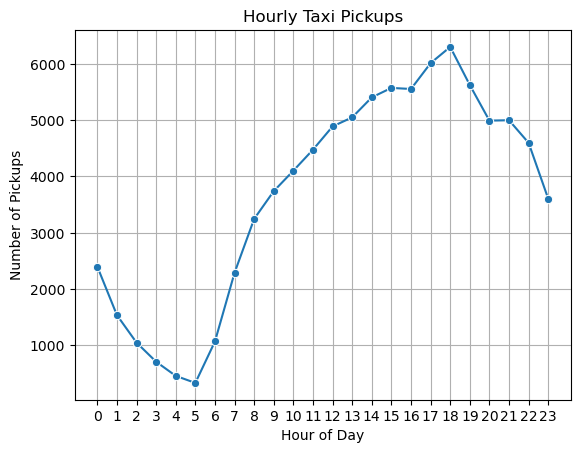

In [518]:
# Find and show the hourly trends in taxi pickups
# Count pickups by hour and sort by hour (0 to 23)
hourly_counts = df['tpep_pickup_hour'].value_counts().sort_index()

sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88017 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000091147
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               88017 non-null  int64  
 1   tpep_pickup_datetime   88017 non-null  object 
 2   tpep_dropoff_datetime  88017 non-null  object 
 3   passenger_count        88017 non-null  float64
 4   trip_distance          88017 non-null  float64
 5   RatecodeID             88017 non-null  float64
 6   store_and_fwd_flag     88017 non-null  object 
 7   PULocationID           88017 non-null  int64  
 8   DOLocationID           88017 non-null  int64  
 9   payment_type           88017 non-null  int64  
 10  fare_amount            88017 non-null  float64
 11  extra                  88017 non-null  float64
 12  mta_tax                88017 non-null  float64
 13  tip_amount             88017 non-null  float64
 14  tolls_amo

In [524]:
# Find and show the daily trends in taxi pickups (days of the week)
# df.index = pd.to_datetime(df.index)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.day_name()

df.info()




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88017 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000091147
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               88017 non-null  int64         
 1   tpep_pickup_datetime   88017 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  88017 non-null  datetime64[ns]
 3   passenger_count        88017 non-null  float64       
 4   trip_distance          88017 non-null  float64       
 5   RatecodeID             88017 non-null  float64       
 6   store_and_fwd_flag     88017 non-null  object        
 7   PULocationID           88017 non-null  int64         
 8   DOLocationID           88017 non-null  int64         
 9   payment_type           88017 non-null  int64         
 10  fare_amount            88017 non-null  float64       
 11  extra                  88017 non-null  float64       
 12  mta_tax        

In [525]:
daily_counts = df['pickup_dayofweek'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

daily_counts.columns = ['day_of_week', 'pickup_count']

plt.figure(figsize=(10,6))
sns.barplot(data=daily_counts, x='day_of_week', y='pickup_count')

plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [526]:
# extract the month from tpep_pickup_datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M').astype(str)


# Extract the value counts and reset index
monthly_counts = df['pickup_month'].value_counts().sort_index().reset_index()
monthly_counts.columns = ['pickup_month', 'pickup_count']

In [527]:
# Show the monthly trends in pickups

# plot the graph

plt.figure(figsize=(12,6))
sns.barplot(data=monthly_counts, x='pickup_month', y='pickup_count')

plt.title('Monthly Taxi Pickup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [528]:
# Analyse the above parameters

# List of financial and distance columns
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a summary DataFrame
check_values = pd.DataFrame({
    'zero_count': [ (df[col] == 0).sum() for col in columns_to_check ],
    'negative_count': [ (df[col] < 0).sum() for col in columns_to_check ],
    'total_rows': len(df)
}, index=columns_to_check)

check_values['zero_percent'] = 100 * check_values['zero_count'] / check_values['total_rows']
check_values['negative_percent'] = 100 * check_values['negative_count'] / check_values['total_rows']

check_values

zero_count  negative_count  total_rows  zero_percent  \
fare_amount            28               0       88017      0.031812   
tip_amount          19752               0       88017     22.441119   
total_amount           21               0       88017      0.023859   
trip_distance        1066               0       88017      1.211130   

               negative_percent  
fare_amount                 0.0  
tip_amount                  0.0  
total_amount                0.0  
trip_distance               0.0

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [529]:
tip_amount can be 0, as the passenger can provide tip or skip it. 
fare_amount can be 0, when the trip_distance is 0. Also we can skip these rows as the 0 fare_amount, total_amount, trip_distance does not yield any productive anlaysis for comparision

SyntaxError: invalid syntax (653843053.py, line 1)

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [530]:
# Create a df with non zero entries for the selected parameters.
df = df[df['fare_amount'] > 0]
df = df[df['total_amount'] > 0]
df = df[df['trip_distance'] > 0]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [531]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue.columns = ['Month', 'Total_Revenue']

plt.figure(figsize=(12,6))
sns.barplot(data=monthly_revenue, x='Month', y='Total_Revenue')
plt.title('Monthly Taxi Revenue (NYC)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [532]:
# Calculate proportion of each quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q').astype(str)

quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()

quarterly_revenue

quarter  total_amount  proportion
0  2022Q4         13.50    0.000005
1  2023Q1     585506.32    0.234745
2  2023Q2     667474.11    0.267608
3  2023Q3     564822.20    0.226452
4  2023Q4     676410.32    0.271190

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [629]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


correlation = df[['trip_distance', 'fare_amount']].corr().iloc[0,1]
print(f'Correlation between trip_distance and fare_amount = {correlation}')


Correlation between trip_distance and fare_amount = 0.9416881277996699


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [535]:
# Show relationship between fare and trip duration

# Compute trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [536]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='trip_duration_min', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = df[['fare_amount', 'trip_duration_min']].corr().iloc[0,1]
print(f'Correlation between fare_amount and trip_duration_min = {correlation}')

Correlation between fare_amount and trip_duration_min = 0.28549213716704247


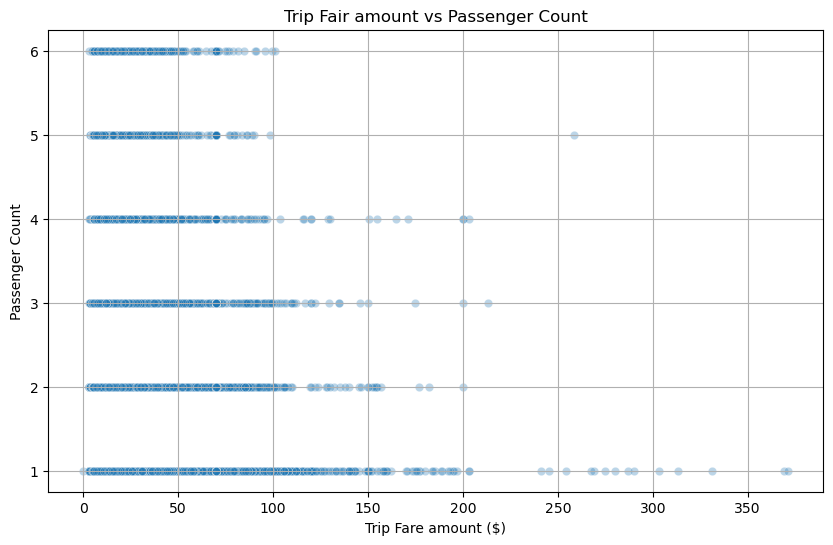

Correlation between fare_amount and passenger_count = 0.0437291765148813


In [537]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='fare_amount', y='passenger_count', alpha=0.3)
plt.title('Trip Fair amount vs Passenger Count')
plt.xlabel('Trip Fare amount ($)')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()


correlation = df[['fare_amount', 'passenger_count']].corr().iloc[0,1]
print(f'Correlation between fare_amount and passenger_count = {correlation}')



In [538]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='tip_amount', y='trip_distance', alpha=0.3)
plt.title('Trip Tip amount vs Trip Distance')
plt.xlabel('Trip Tip amount ($)')
plt.ylabel('Trip Distance')
plt.grid(True)
plt.show()


correlation = df[['tip_amount', 'trip_distance']].corr().iloc[0,1]
print(f'Correlation between tip_amount and trip_distance = {correlation}')



Correlation between tip_amount and trip_distance = 0.5675347189478587


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [539]:
# Analyse the distribution of different payment types (payment_type).
plt.figure(figsize=(10,6))
sns.displot(data=df['payment_type'])
plt.title('Distribution of different payment types')
plt.show()


<Figure size 1000x600 with 0 Axes>

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [540]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [541]:
import geopandas as gpd

In [542]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('C:/Sowmya-Upgrad/Assignment-EDA/taxi_zones/taxi_zones.shp') # read the .shp file using gpd 'C:\Sowmya-Upgrad\Assignment-EDA\taxi_zones'
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [543]:
zones.shape

(263, 7)

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

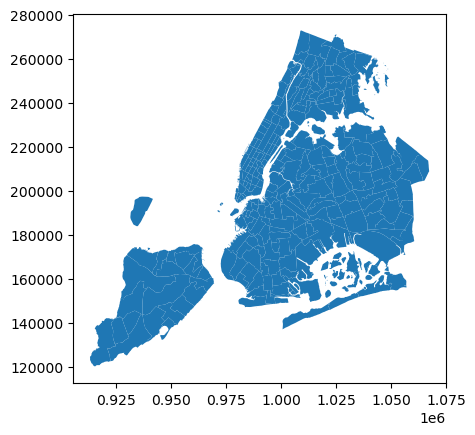

In [544]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [545]:
# Merge zones and trip records using locationID and PULocationID

dfZones = df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left', suffixes=('_pickup', '_dropoff')).reset_index()

# Merge again to get the dropoff zone
dfZones = dfZones.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('_pickup', '_dropoff')).reset_index()
dfZones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86965 entries, 0 to 86964
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   level_0                86965 non-null  int64         
 1   index                  86965 non-null  int64         
 2   VendorID               86965 non-null  int64         
 3   tpep_pickup_datetime   86965 non-null  datetime64[ns]
 4   tpep_dropoff_datetime  86965 non-null  datetime64[ns]
 5   passenger_count        86965 non-null  float64       
 6   trip_distance          86965 non-null  float64       
 7   RatecodeID             86965 non-null  float64       
 8   store_and_fwd_flag     86965 non-null  object        
 9   PULocationID           86965 non-null  int64         
 10  DOLocationID           86965 non-null  int64         
 11  payment_type           86965 non-null  int64         
 12  fare_amount            86965 non-null  float64       
 13  e

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [546]:
# Group data by location and calculate the number of trips

dfTriplocationGroupedData = dfZones.groupby(['LocationID_pickup'])['tpep_dropoff_datetime'].count().rename('trip_Count')
dfTriplocationGroupedData



LocationID_pickup
1.0         1
4.0        81
6.0         4
7.0        31
8.0         2
         ... 
259.0       3
260.0      11
261.0     438
262.0    1066
263.0    1713
Name: trip_Count, Length: 207, dtype: int64

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [547]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(dfTriplocationGroupedData, left_on='LocationID', right_on='LocationID_pickup', how='left', suffixes=('_pickup', '_dropoff'))
zones.head()




OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_Count  
0         1.0  
1         NaN  
2         NaN  
3        81.0  
4         NaN

In [548]:
zones['trip_Count'] = zones['trip_Count'].fillna(0)

In [549]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_Count  
0         1.0  
1         0.0  
2         0.0  
3        81.0  
4         0.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

Figure(1400x1200)
Axes(0.125,0.11;0.775x0.77)


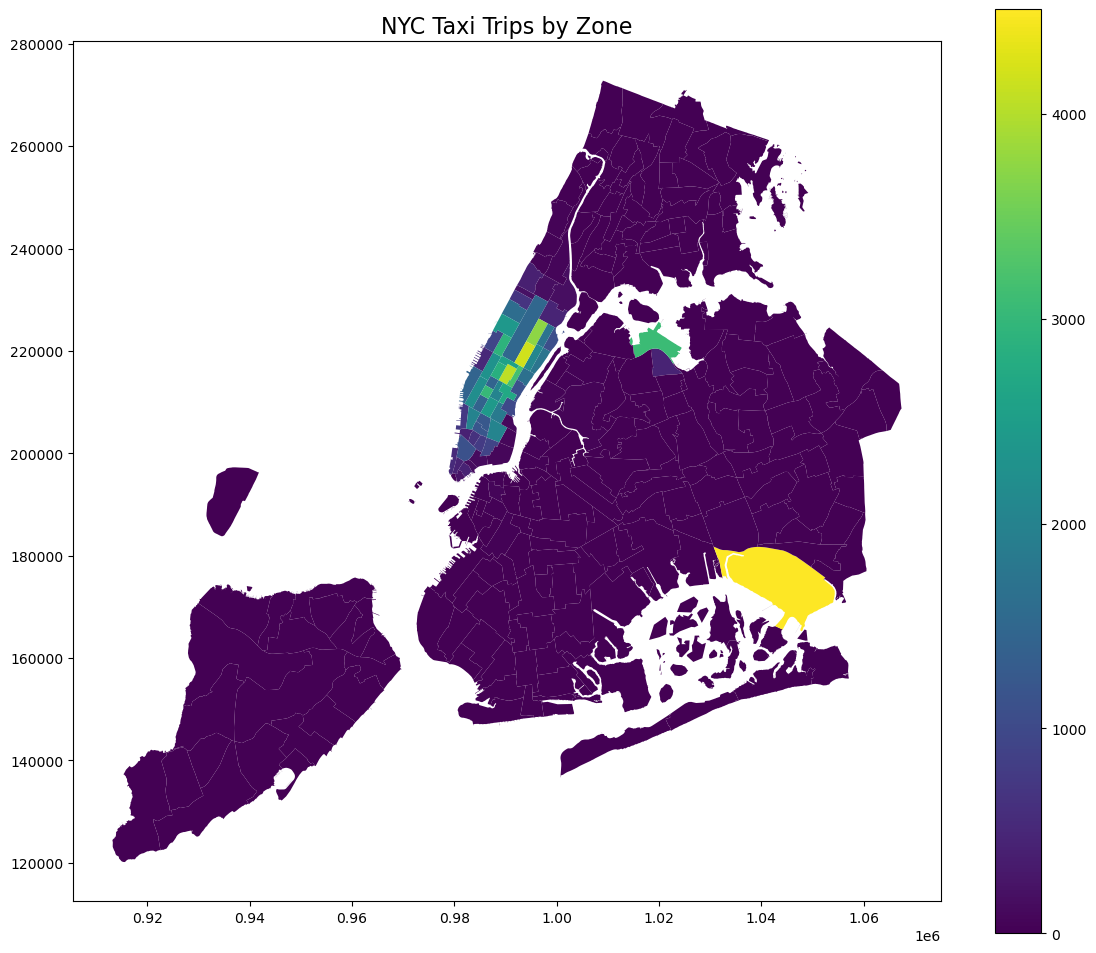

In [630]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

print(fig)
print(ax)

zones.plot(column='trip_Count', 
           linewidth=0.5, 
           legend=True, 
           ax=ax)

ax.set_title('NYC Taxi Trips by Zone', fontsize=16)

plt.show()

In [551]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by='trip_Count', ascending=False)
zones_sorted.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  trip_Count  
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...      4511.0  
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...      4184.0  
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...      4070.0  
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...      3740.0  
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...      3168.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


In [552]:
# Busiest hours, days and months
# Busiest hour
# Busiest hour is 18th hour i.e 6PM

# Busiest day
# Busiest day is 'Thrusday'

# Busiest month
# Busiest month is may.

In [553]:
# Trends in revenue collected
# the highest revenue collected is in october month

Trends in quarterly revenue:
2023Q4	676410.32

How fare depends on trip distance, trip duration and passenger counts

* Fare amount is positively correlated to the Trip Distance with correlation is - 0.94
* Fare amount is positively correlated to the Trip Duration with correlation is - 0.285
* Fare amount is positively correlated to the Passenger count with correlation is - 0.04 
The fare amount is higher cumilativly received for 1 passenger


How tip amount depends on trip distance

* Tip Amount is positively correlated to the Trip Distance with correlation is - 0.5 and the most instances of Tip Amount received if the distance is below 25 miles 


How tip amount depends on trip distance

* Tip Amount is positively correlated to the Trip Distance with correlation is - 0.5 and the most instances of Tip Amount received if the distance is below 25 miles 


In [554]:
Busiest zones
The top 3 busiest zones are
* JFK Airport
* Upper East Side South
* Midtown Center	

SyntaxError: invalid syntax (354791903.py, line 1)

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [555]:
dfZones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86965 entries, 0 to 86964
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   level_0                86965 non-null  int64         
 1   index                  86965 non-null  int64         
 2   VendorID               86965 non-null  int64         
 3   tpep_pickup_datetime   86965 non-null  datetime64[ns]
 4   tpep_dropoff_datetime  86965 non-null  datetime64[ns]
 5   passenger_count        86965 non-null  float64       
 6   trip_distance          86965 non-null  float64       
 7   RatecodeID             86965 non-null  float64       
 8   store_and_fwd_flag     86965 non-null  object        
 9   PULocationID           86965 non-null  int64         
 10  DOLocationID           86965 non-null  int64         
 11  payment_type           86965 non-null  int64         
 12  fare_amount            86965 non-null  float64       
 13  e

In [556]:
dfZones['trip_duration_hr'] = dfZones['trip_duration_min'] / 60

In [557]:
# Find routes which have the slowest speeds at different times of the day


# Group by route and hour
route_hourly = dfZones.groupby(
    ['PULocationID', 'DOLocationID', 'zone_pickup','zone_dropoff','tpep_pickup_hour']
).agg(
    avg_distance=('trip_distance', 'mean'),
    avg_duration_hr=('trip_duration_hr', 'mean'),
    trip_count=('trip_distance', 'count') 
).reset_index()

# Calculate average speed in miles/hour
route_hourly['avg_speed_mph'] = route_hourly['avg_distance'] / route_hourly['avg_duration_hr']


slow_routes = route_hourly[route_hourly['trip_count'] >= 10]
slow_routes = slow_routes.sort_values(by='avg_speed_mph').head(10)

print(slow_routes)


       PULocationID  DOLocationID                   zone_pickup  \
16844           143           239           Lincoln Square West   
1856             48            68                  Clinton East   
30071           236           237         Upper East Side North   
30630           237           161         Upper East Side South   
31545           238           239         Upper West Side North   
1870             48            68                  Clinton East   
30895           237           237         Upper East Side South   
19644           161           230                Midtown Center   
20405           162           161                  Midtown East   
24540           186           230  Penn Station/Madison Sq West   

                    zone_dropoff  tpep_pickup_hour  avg_distance  \
16844      Upper West Side South                17      0.930714   
1856                East Chelsea                 8      1.321000   
30071      Upper East Side South                21      0.

How does identifying high-traffic, high-demand routes help us?

Identifying high-traffic, high-demand routes helps optimize taxi operations, reduce wait times, increase revenue and enhance customer experience.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [558]:
# Visualise the number of trips per hour and find the busiest hour
dfPerHoutTrips = dfZones.groupby(['tpep_pickup_hour'])['tpep_dropoff_datetime'].count().rename('trip_count').reset_index()
sns.barplot(dfPerHoutTrips, x='tpep_pickup_hour', y='trip_count')
plt.show()



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [625]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Count trips per hour in the sample
hourly_counts = df['tpep_pickup_hour'].value_counts().sort_values(ascending=False)

# Get the 5 busiest hours
top_5_hours = hourly_counts.head(5)

# Scale up the sampled counts
top_5_hours_scaled = (top_5_hours / sample_fraction).astype(int)

# Combine into a DataFrame
top_5_actual = pd.DataFrame({
    'pickup_hour': top_5_hours.index,
    'sampled_trips': top_5_hours.values,
    'estimated_total_trips': top_5_hours_scaled.values
})

print(top_5_actual)

   pickup_hour  sampled_trips  estimated_total_trips
0           18           6240                 124800
1           17           5935                 118700
2           19           5571                 111420
3           15           5502                 110040
4           16           5476                 109520


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [559]:
print(dfZones.index)

RangeIndex(start=0, stop=86965, step=1)


In [560]:
# Compare traffic trends for the week days and weekends
dfZones['is_weekend'] = dfZones['tpep_dropoff_datetime'].dt.weekday >= 5
dfZones['trip_duration_hr'] = dfZones['trip_duration_min'] / 60
dfZones['avg_speed_mph'] = dfZones['trip_distance'] / dfZones['trip_duration_hr']

In [561]:
dfZones[dfZones['is_weekend'] == True].shape

(23562, 43)

In [562]:
# Compare traffic trends for the week days and weekends

traffic_comparison = dfZones.groupby('is_weekend').agg({
    'trip_distance': 'mean',
    'fare_amount': 'mean',
    'trip_duration_min': 'mean',
    'avg_speed_mph': 'mean',
    'tpep_dropoff_datetime': 'count'  # total trips
}).rename(index={False: 'Weekday', True: 'Weekend'}).rename(columns={'tpep_dropoff_datetime': 'trip_count'})

print(traffic_comparison)


            trip_distance  fare_amount  trip_duration_min  avg_speed_mph  \
is_weekend                                                                 
Weekday          3.435469    19.597575          17.705329            inf   
Weekend          3.555068    19.433113          16.607204            inf   

            trip_count  
is_weekend              
Weekday          63403  
Weekend          23562  


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [568]:
# Find top 10 pickup and dropoff zones

dfHourlydataPickup = dfZones.groupby(['tpep_pickup_hour', 'zone_pickup']).size().reset_index(name='trip_count')

# Sum trips across all hours for each zone
zoneHourlyTotalPickup = dfHourlydataPickup.groupby('zone_pickup')['trip_count'].sum().reset_index()

# Sort and get top 10
top_zones = zoneHourlyTotalPickup.sort_values(by='trip_count', ascending=False).head(10)
print('Top 10 pickup zones')
print(top_zones)

dfHourlydataDropOff = dfZones.groupby(['tpep_pickup_hour', 'zone_dropoff']).size().reset_index(name='trip_count')

# Sum trips across all hours for each zone
zoneHourlyTotalDropoff = dfHourlydataDropOff.groupby('zone_dropoff')['trip_count'].sum().reset_index()

# Sort and get top 10
top_dropOffzones = zoneHourlyTotalDropoff.sort_values(by='trip_count', ascending=False).head(10)
print('Top 10 drop-off zones')
print(top_dropOffzones)




Top 10 pickup zones
                      zone_pickup  trip_count
97                    JFK Airport        4511
186         Upper East Side South        4184
123                Midtown Center        4070
185         Upper East Side North        3740
124                  Midtown East        3168
106             LaGuardia Airport        3083
145  Penn Station/Madison Sq West        3024
110           Lincoln Square East        2918
179     Times Sq/Theatre District        2848
132                   Murray Hill        2708
Top 10 drop-off zones
                  zone_dropoff  trip_count
216      Upper East Side North        3948
217      Upper East Side South        3702
146             Midtown Center        3392
210  Times Sq/Theatre District        2655
155                Murray Hill        2577
127        Lincoln Square East        2521
147               Midtown East        2470
219      Upper West Side South        2462
126            Lenox Hill West        2373
61                East

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [574]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

dfHourlydataPickup = dfZones.groupby(['tpep_pickup_hour', 'zone_pickup']).size().reset_index(name='trip_count')

# Sum trips across all hours for each zone
zoneHourlyTotalPickup = dfHourlydataPickup.groupby('zone_pickup')['trip_count'].sum().reset_index()

# drop offs
dfHourlydataDropOff = dfZones.groupby(['tpep_pickup_hour', 'zone_dropoff']).size().reset_index(name='trip_count')

# Sum trips across all hours for each zone
zoneHourlyTotalDropoff = dfHourlydataDropOff.groupby('zone_dropoff')['trip_count'].sum().reset_index()

# getting the top pickup and dropoff zones count
top_pickupzones = zoneHourlyTotalPickup.sort_values(by='trip_count', ascending=False).head(10)
top_dropOffzones = zoneHourlyTotalDropoff.sort_values(by='trip_count', ascending=False).head(10)

top10pickupsCount = top_pickupzones['trip_count'].sum()
top10DropOffsCount = top_dropOffzones['trip_count'].sum()

# getting the lowest pickup and dropoff zones count
lowest_pickupzones = zoneHourlyTotalPickup.sort_values(by='trip_count', ascending=True).head(10)
lowest_dropOffzones = zoneHourlyTotalDropoff.sort_values(by='trip_count', ascending=True).head(10)

lowest10pickupsCount = lowest_pickupzones['trip_count'].sum()
lowest10DropOffsCount = top_dropOffzones['trip_count'].sum()

# 10 highest (pickup/drop) ratio
ratio_top = top10pickupsCount/top10DropOffsCount

# 10 lowest (pickup/drop) ratio
ratio_lowest = lowest10pickupsCount/lowest10DropOffsCount

print(f'Highest (pickup/drop) ratio = {ratio_top}')
print(f'Lowest (pickup/drop) ratio = {ratio_lowest}')




Highest (pickup/drop) ratio = 1.2108593446215843
Lowest (pickup/drop) ratio = 0.00035349429106719925


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [627]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night trips (11 PM to 5 AM)
night_df = dfZones[(dfZones['tpep_pickup_hour'] >= 23) | (dfZones['tpep_pickup_hour'] <= 5)]
# Count night pickups per zone
night_pickups = night_df['zone_pickup'].value_counts().head(10)

# Count night dropoffs per zone
night_dropoffs = night_df['zone_dropoff'].value_counts().head(10)

print('---------------------------------------')
print(f'Top 10 night pickups')
print('---------------------------------------')
print(night_pickups)

print('---------------------------------------')
print(f'Top 10 night drop-offs')
print('---------------------------------------')
print(night_dropoffs)

---------------------------------------
Top 10 night pickups
---------------------------------------
zone_pickup
East Village                    737
JFK Airport                     654
West Village                    622
Clinton East                    507
Lower East Side                 456
Greenwich Village South         410
Times Sq/Theatre District       370
Penn Station/Madison Sq West    299
Midtown South                   297
LaGuardia Airport               286
Name: count, dtype: int64
---------------------------------------
Top 10 night drop-offs
---------------------------------------
zone_dropoff
East Village             405
Clinton East             315
Gramercy                 284
Murray Hill              275
Lenox Hill West          272
East Chelsea             256
Upper West Side South    239
Yorkville West           235
West Village             226
Upper East Side North    217
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [582]:
# Filter for night hours (11 PM to 5 AM)

# Define a new column for time period
dfZones['time_period'] = dfZones['tpep_pickup_hour'].apply(lambda x: 'Night' if (x >= 23 or x <= 5) else 'Day')

# Group by time period and sum total_amount
revenue_by_period = dfZones.groupby('time_period')['total_amount'].sum()

# Calculate percentage share
revenue_share = (revenue_by_period / revenue_by_period.sum()) * 100

print("Revenue Share by Time Period (Night vs Day):")
print(revenue_share.round(2))  # Rounded to 2 decimal places


Revenue Share by Time Period (Night vs Day):
time_period
Day      88.46
Night    11.54
Name: total_amount, dtype: float64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [583]:
# Analyse the fare per mile per passenger for different passenger counts

dfZones['fare_per_mile'] = dfZones['fare_amount'] / dfZones['trip_distance']

# Group by passenger count
grouped = dfZones.groupby('passenger_count').agg(
    avg_fare_per_mile=('fare_per_mile', 'mean')
).reset_index()

# Compute fare per mile per passenger
grouped['fare_per_mile_per_passenger'] = grouped['avg_fare_per_mile'] / grouped['passenger_count']

print(grouped[['passenger_count', 'avg_fare_per_mile', 'fare_per_mile_per_passenger']])


   passenger_count  avg_fare_per_mile  fare_per_mile_per_passenger
0              1.0          11.327636                    11.327636
1              2.0          13.058201                     6.529100
2              3.0           9.021873                     3.007291
3              4.0          10.996080                     2.749020
4              5.0           9.815830                     1.963166
5              6.0           8.022795                     1.337132


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [593]:
# Compare the average fare per mile for different days and for different times of the day
# avgerage fare per mile for different days

# Group by passenger count
grouped = dfZones.groupby('pickup_dayofweek').agg(
    avg_fare_per_mile=('fare_per_mile', 'mean')
).reset_index()

# Compute fare per mile per passenger
grouped['fare_per_mile_per_day'] = grouped['avg_fare_per_mile'] / 7 # as we have 7 days

print('-----------------------------------------------------------------')
print('Average fare per mile for different days of week')
print('-----------------------------------------------------------------')
print(grouped[['pickup_dayofweek', 'avg_fare_per_mile', 'fare_per_mile_per_day']])

# avgerage fare per mile for different times of day

print('-----------------------------------------------------------------')

# Group by passenger count
grouped = dfZones.groupby('tpep_pickup_hour').agg(
    avg_fare_per_mile=('fare_per_mile', 'mean')
).reset_index()

# Compute fare per mile per passenger
grouped['fare_per_mile_per_hour'] = grouped['avg_fare_per_mile'] / 24 # as we have 24 hours

print('-----------------------------------------------------------------')
print('Average fare per mile for different hours of the day')
print('-----------------------------------------------------------------')
print(grouped[['tpep_pickup_hour', 'avg_fare_per_mile', 'fare_per_mile_per_hour']])


-----------------------------------------------------------------
Average fare per mile for different days of week
-----------------------------------------------------------------
  pickup_dayofweek  avg_fare_per_mile  fare_per_mile_per_day
0           Friday          11.510954               1.644422
1           Monday          10.685041               1.526434
2         Saturday          11.073102               1.581872
3           Sunday          14.106029               2.015147
4         Thursday           9.896883               1.413840
5          Tuesday          12.535013               1.790716
6        Wednesday          10.761136               1.537305
-----------------------------------------------------------------
-----------------------------------------------------------------
Average fare per mile for different hours of the day
-----------------------------------------------------------------
    tpep_pickup_hour  avg_fare_per_mile  fare_per_mile_per_hour
0               

In [597]:
# Compare fare per mile for different vendors

# Group by passenger count
grouped = dfZones.groupby('VendorID').agg(
    avg_fare_per_mile=('fare_per_mile', 'mean')
).reset_index()

# Compute fare per mile per pasvendorsenger
grouped['fare_per_mile_per_vendor'] = grouped['avg_fare_per_mile'] / grouped['VendorID'].size # grouped['VendorID'].size gives number of vendors

print('-----------------------------------------------------------------')
print('Average fare per mile for different vendors')
print('-----------------------------------------------------------------')
print(grouped[['VendorID', 'avg_fare_per_mile', 'fare_per_mile_per_vendor']])


-----------------------------------------------------------------
Average fare per mile for different vendors
-----------------------------------------------------------------
   VendorID  avg_fare_per_mile  fare_per_mile_per_vendor
0         1           8.177174                  4.088587
1         2          12.608770                  6.304385


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


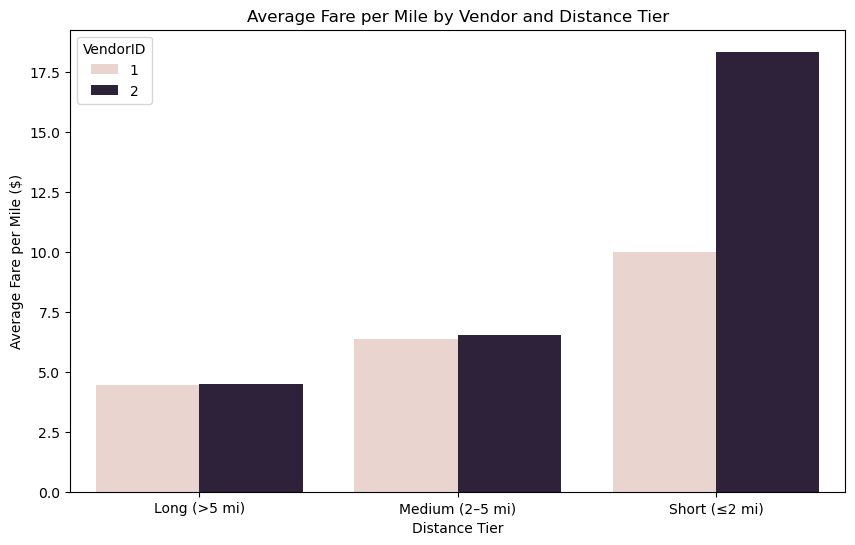

In [600]:
# Defining distance tiers

def distance_tier(dist):
    if dist <= 2:
        return 'Short (≤2 mi)'
    elif dist <= 5:
        return 'Medium (2–5 mi)'
    else:
        return 'Long (>5 mi)'

dfZones['distance_tier'] = dfZones['trip_distance'].apply(distance_tier)

# Group by VendorID and distance tier
vendor_fare_grouped = dfZones.groupby(['VendorID', 'distance_tier']).agg(
    avg_fare_per_mile=('fare_per_mile', 'mean'),
    trip_count=('fare_per_mile', 'count')
).reset_index()


plt.figure(figsize=(10,6))
sns.barplot(data=vendor_fare_grouped, x='distance_tier', y='avg_fare_per_mile', hue='VendorID')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.xlabel('Distance Tier')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

C:\Users\kaush\AppData\Local\Temp\ipykernel_22256\412180061.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = dfZones.groupby('distance_bin')['tip_percentage'].mean().reset_index()
C:\Users\kaush\AppData\Local\Temp\ipykernel_22256\412180061.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_by_distance, x='distance_bin', y='tip_percentage', palette='Blues_d')


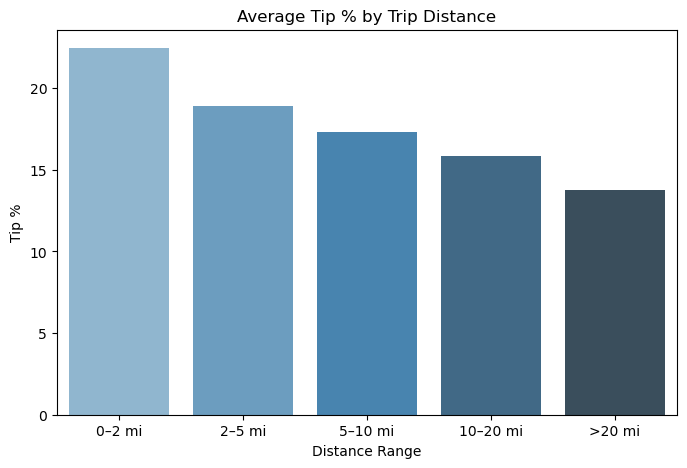

C:\Users\kaush\AppData\Local\Temp\ipykernel_22256\412180061.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percentage', palette='Greens_d')


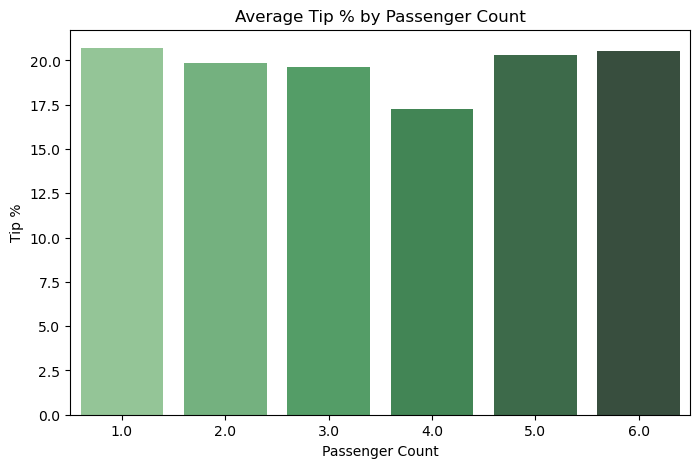

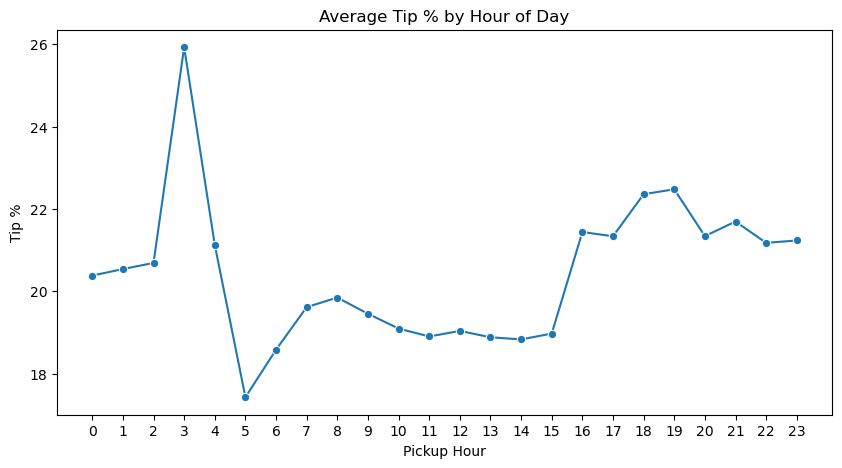

In [604]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Tip percentage column
dfZones['tip_percentage'] = (dfZones['tip_amount'] / dfZones['fare_amount']) * 100

# Create distance bins
bins = [0, 2, 5, 10, 20, dfZones['trip_distance'].max()]
labels = ['0–2 mi', '2–5 mi', '5–10 mi', '10–20 mi', '>20 mi']

dfZones['distance_bin'] = pd.cut(dfZones['trip_distance'], bins=bins, labels=labels)

# Group by distance bin
tip_by_distance = dfZones.groupby('distance_bin')['tip_percentage'].mean().reset_index()

# group by passesnger count
tip_by_passenger = dfZones.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# groupby hours od day
tip_by_hour = dfZones.groupby('tpep_pickup_hour')['tip_percentage'].mean().reset_index()

# plot for Tip for Trip distance
plt.figure(figsize=(8,5))
sns.barplot(data=tip_by_distance, x='distance_bin', y='tip_percentage', palette='Blues_d')
plt.title('Average Tip % by Trip Distance')
plt.ylabel('Tip %')
plt.xlabel('Distance Range')
plt.show()

# plot for Tip for passenger count
plt.figure(figsize=(8,5))
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percentage', palette='Greens_d')
plt.title('Average Tip % by Passenger Count')
plt.ylabel('Tip %')
plt.xlabel('Passenger Count')
plt.show()

# plot for Tip for hour
plt.figure(figsize=(10,5))
sns.lineplot(data=tip_by_hour, x='tpep_pickup_hour', y='tip_percentage', marker='o')
plt.title('Average Tip % by Hour of Day')
plt.ylabel('Tip %')
plt.xlabel('Pickup Hour')
plt.xticks(range(0, 24))
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

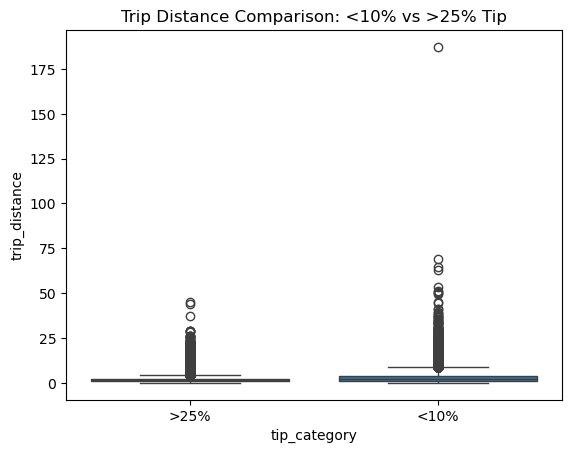

In [607]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

def tip_category(tip_pct):
    if tip_pct < 10:
        return '<10%'
    elif tip_pct > 25:
        return '>25%'
    else:
        return None  # Ignore middle-range tips

dfZones['tip_category'] = dfZones['tip_percentage'].apply(tip_category)

# Filter only the two categories we care about
df_compare = dfZones[dfZones['tip_category'].isin(['<10%', '>25%'])]

# Group by tip category
comparison = df_compare.groupby('tip_category').agg({
    'trip_distance': 'mean',
    'fare_amount': 'mean',
    'passenger_count': 'mean',
    'tip_percentage': 'mean',
    'payment_type': lambda x: x.mode()[0],  # most common
    'tpep_pickup_hour': 'mean'
}).reset_index()

# box plot for compare data
sns.boxplot(data=df_compare, x='tip_category', y='trip_distance')
plt.title('Trip Distance Comparison: <10% vs >25% Tip')
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

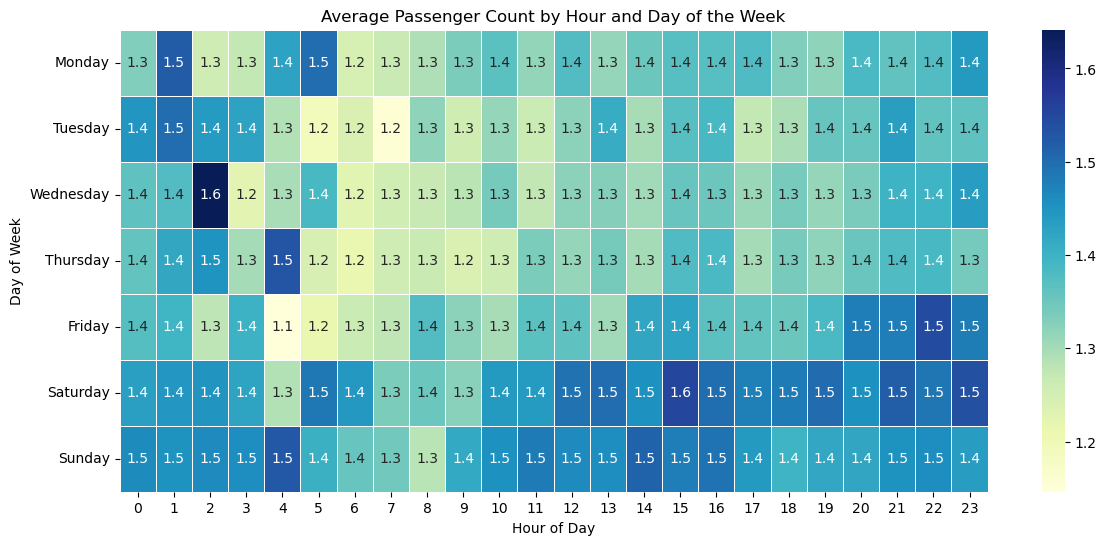

In [611]:
# See how passenger count varies across hours and days

# Group by hour and day, calculate average passenger count
passenger_trend = dfZones.groupby(['pickup_dayofweek', 'tpep_pickup_hour'])['passenger_count'].mean().reset_index()

# Pivot the data for heatmap
pivot_data = passenger_trend.pivot(index='pickup_dayofweek', columns='tpep_pickup_hour', values='passenger_count')

# Reorder days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_data = pivot_data.reindex(days_order)


# heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)
plt.title('Average Passenger Count by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [631]:
# How does passenger count vary across zones

# Group by pickup zone and calculate total and average passenger count
zone_passenger_stats = dfZones.groupby('zone_pickup')['passenger_count'].agg(
    total_passengers='sum'
).reset_index()

zone_passenger_stats.sort_values(by='total_passengers', ascending=False).head(10)

zone_pickup  total_passengers
97                    JFK Airport            6739.0
123                Midtown Center            5631.0
186         Upper East Side South            5546.0
185         Upper East Side North            4964.0
179     Times Sq/Theatre District            4273.0
106             LaGuardia Airport            4225.0
145  Penn Station/Madison Sq West            4101.0
124                  Midtown East            4083.0
110           Lincoln Square East            4010.0
132                   Murray Hill            3615.0

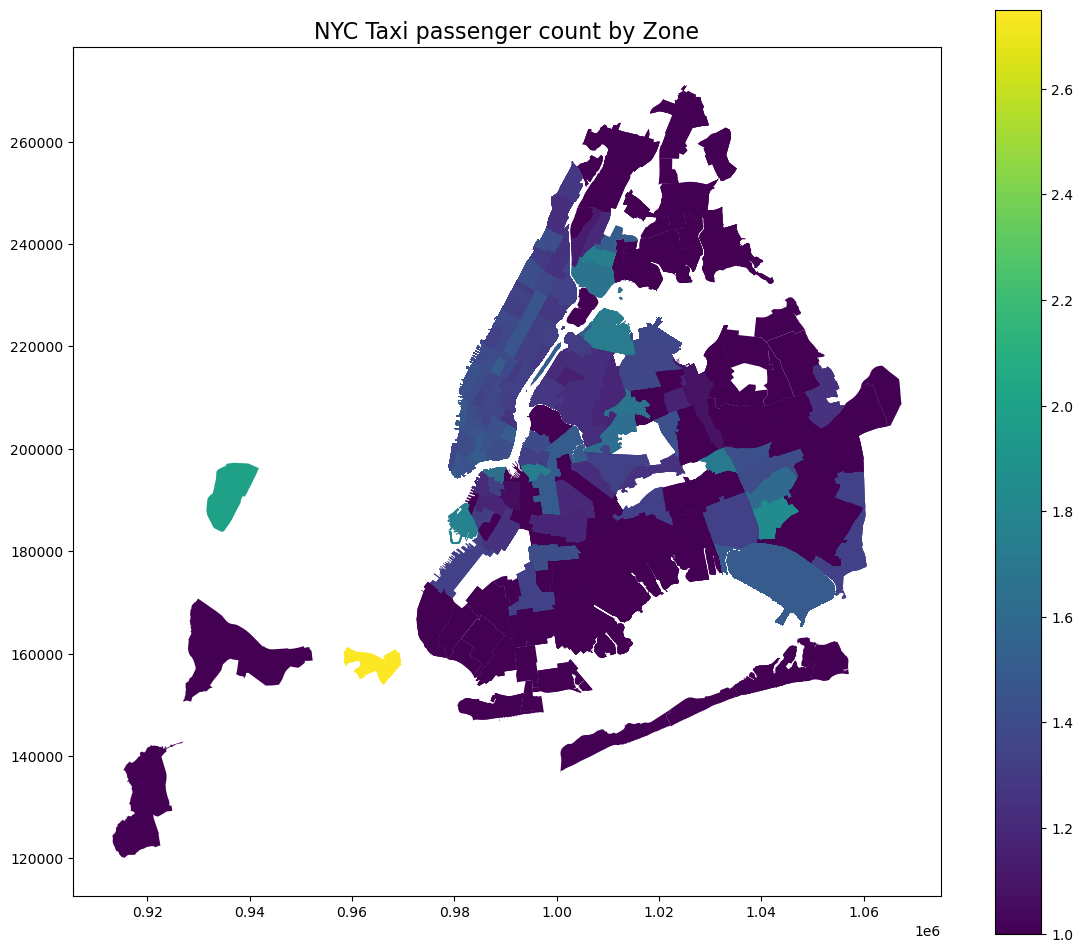

In [638]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Select the columns from df to subset
df_subset = df[['PULocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'tpep_pickup_datetime','improvement_surcharge', 'congestion_surcharge']]

# Merge with zones
zones_with_trips = zones.merge(
    df_subset,
    left_on='LocationID',
    right_on='PULocationID',
    how='left',
    suffixes=('_zone', '_trip')
).reset_index(drop=True)


zones_with_trips_grouped = zones_with_trips.groupby(['LocationID'])['passenger_count'].mean().reset_index()

zones_with_trips_grouped.fillna(0)

# Rename for clarity
zones_with_trips_grouped.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merge the average passenger count back into the original GeoDataFrame
zones_with_trips = zones_with_trips.merge(
    zones_with_trips_grouped,
    on='LocationID',
    how='left'
)

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

zones_with_trips.plot(column='avg_passenger_count', 
           linewidth=0.5, 
           legend=True, 
           ax=ax)

ax.set_title('NYC Taxi passenger count by Zone', fontsize=16)

plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [641]:
# How often is each surcharge applied?

# Count non-zero and non-null entries
improvement_applied = zones_with_trips['improvement_surcharge'].gt(0).sum()
congestion_applied = zones_with_trips['congestion_surcharge'].gt(0).sum()

# Total number of trips (rows with data)
total_trips = zones_with_trips['fare_amount'].notna().sum()

# Print counts and percentages
print(f"Improvement Surcharge Applied: {improvement_applied} ({improvement_applied / total_trips:.2%})")
print(f"Congestion Surcharge Applied: {congestion_applied} ({congestion_applied / total_trips:.2%})")

pickup_congestion = dfZones[dfZones['congestion_surcharge'] > 0].groupby('zone_pickup').size().reset_index(name='pickup_congestion_count')
top_pickup_zones = pickup_congestion.sort_values(by='pickup_congestion_count', ascending=False).head(10)


print(top_pickup_zones)

dropoff_congestion = dfZones[dfZones['congestion_surcharge'] > 0].groupby('zone_dropoff').size().reset_index(name='dropoff_congestion_count')
top_dropoff_zones = dropoff_congestion.sort_values(by='dropoff_congestion_count', ascending=False).head(10)

print(top_dropoff_zones)


Improvement Surcharge Applied: 86184 (100.00%)
Congestion Surcharge Applied: 80332 (93.21%)
                      zone_pickup  pickup_congestion_count
104         Upper East Side South                     4171
70                 Midtown Center                     4038
103         Upper East Side North                     3725
71                   Midtown East                     3159
79   Penn Station/Madison Sq West                     3009
59            Lincoln Square East                     2913
98      Times Sq/Theatre District                     2798
76                    Murray Hill                     2695
72                  Midtown North                     2532
102                      Union Sq                     2419
                  zone_dropoff  dropoff_congestion_count
194      Upper East Side North                      3911
195      Upper East Side South                      3696
130             Midtown Center                      3384
188  Times Sq/Theatre District 

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Handle taxi at high-demand zones

* As 'JFK Airport', 'Upper East Side South', 'Midtown Center' are top 3 zones where the pickup count is more than 4k in a year need to make sure these zones has taxi availability during the peak hours like 16:00 -19:00 (i.e 4PM - 7PM) mainly during the second half of week (thrusday-saturday).

2. Time efficiency
(refer 3.2.1)
As the slowest routes indicates time delays in trip  1) 'Lincoln Square West' - ' Upper West Side South' 2) 'Upper East Side South' - 'Midtown Center ' . These delay can be overcome by following few practices during the peak hours/day
* Introduce trip sharing
* Communicate any conjunction to drivers by some  live traffic feeding
* Alert drivers on alternative routes on conjunction.
* Provide some discounts on trip delays to attract more passengers.


3. Efficient Night trips
(refer section 3.2.7)
As the Revenue generated in the day is 88.5% and at Night is almost 11.5%. As the percent of revenue generated in the night is more than 10 %, few pratices can impact the revenue collected from night
* Handle safe drop offs and provide more cabs in the routes like 'East Village','JFK Airport','West Village' which have highest pickups.
* Live updates to passengers during night for more safety
* Increasing women drivers to attract Women passengers
* Discounts to schedule night rides to attract passengers and get more non-time dependent trips avoid traffic conjunction and over come and reduce trip delay percentages 

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Dynamic Positioning Based on Hourly Demand Trends
* Pre-deploy cabs to zones with historically high pickups during each hour of the day.
* Midtown Center & Upper East Side South → high demand during evening peak (4–7 PM).
* JFK Airport → high demand throughout the day, especially during flight landing windows.

2. Day based deployment
Be ready to pull cabs from one to another based on days trend to pick up and drops
Examples: 
* Thursday–Saturday: Higher demand in nightlife zones (e.g., East Village, West Village).
* Weekdays (Mon–Wed): More pickups in business areas (e.g., Midtown center, Upper East Side South).

3 Season adaption
Make the cabs ready to focus on few busy areas based on seasons

* Adjust deployment based on quarterly patterns (e.g., Q4 = peak pickup count).
* Q4 (Oct-Dec): Higher demand at JFK and tourist-heavy zones.
* Reduce the cabs count during the Q3 quarter, which has less pickup counts.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1.Introduce Ride-Sharing Discounts
Insight: Majority of trips have passenger count < 4.

Strategy:

For trips with 1–2 passengers, offer discounts for shared rides.

Implement a tiered fare system:
Solo = standard fare
Shared = 10–15% discount per passenger

Benefit:
Increases vehicle occupancy & trip revenue per mile
Reduces cost for solo travelers during peak demand



2. Zone-Based Surge Pricing  - During Peak Hours
Insight: 'JFK Airport', 'Upper East Side South', and 'Midtown Center' are high-demand zones between 4 PM – 7 PM, especially Thu–Sat.

Strategy:

Apply surge pricing (1.2x–1.5x) in these zones during the peak time window.

Provide driver incentives to be available in these areas during peak.

Benefit:
Captures high willingness to pay during peak hours
Attracts more drivers to meet demand


3. Distance-Duration based catogorized Pricing
Insight: Most trips are <25 miles and <90 minutes.

Strategy:

Introduce fare tiers:

Tier 1: Short trips (<5 miles) – lower base fare, higher per-mile rate

Tier 2: Standard trips (5–25 miles) – standard fare

Tier 3: Long trips (>25 miles or >90 mins) – discounted per-mile rate to stay competitive

Benefit:
Maximizes revenue on most common trip types
Remains competitive on longer trips, reducing drop-offs